In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Let's build a brain
model = Sequential()

# First, we'll add a layer that looks at small parts of the picture
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Then, we'll add a layer that picks the most important parts
model.add(MaxPooling2D(pool_size=(2, 2)))

# We'll add another layer to look at the important parts more closely
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# And another layer to pick the most important parts again
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now, we'll flatten the picture into a long line
model.add(Flatten())

# We'll add a layer to think about the line and make a guess
model.add(Dense(128, activation='relu'))

# Finally, we'll make a final guess about the number
model.add(Dense(10, activation='softmax'))

# Conv2D (Convolutional Layer):
Imagine you have a picture (like a photo of a cat). Now, you want to find certain things in the picture, like ears, eyes, or whiskers. A Conv2D layer is like a little "window" that slides over the picture, looking for things like edges and shapes. Each time the window slides over a part of the picture, it tries to find a little part of the cat, like an ear or an eye.

# MaxPooling2D (Pooling Layer):
After the Conv2D layer finds important parts like ears or eyes, we don’t need all the little details anymore. So, the MaxPooling2D layer helps by shrinking the picture a little and keeping only the most important parts, like the biggest shapes. It’s like looking at a picture through a small window and saying, "What’s the biggest thing in this part?" and remembering that.

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9111 - loss: 0.2994
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9871 - loss: 0.0420
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9912 - loss: 0.0265
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9945 - loss: 0.0174
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9962 - loss: 0.0118
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9969 - loss: 0.0098
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9974 - loss: 0.0085
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9977 - loss: 0.0070
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9976 - loss: 0.0066
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9982 - loss: 0.0050


In [20]:
img_path = 'eight.png'
img = tf.keras.utils.load_img(img_path, color_mode="grayscale", target_size=(28, 28))
img_array = tf.keras.utils.img_to_array(img)
# img_array = 255 - img_array  # Invert colors if needed
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [21]:
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Predicted digit: 9


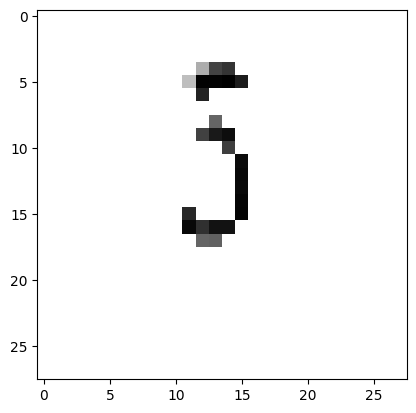

In [22]:
print("Predicted digit:", predicted_digit)
plt.imshow(img_array[0], cmap='gray')
plt.show()